In [3]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from collections import defaultdict

load_dotenv()
directory = os.getenv("output_dir")

In [4]:
def ChangeExemplarsToBinary(datasetPath: str) -> pd.DataFrame:
    toBinary_df = pd.read_csv(datasetPath)
    toBinary_df = toBinary_df.sort_values(by=["station_id"])
    toBinary_df = toBinary_df.reset_index(drop=True)
    toBinary_df.index += 1
    toBinary_df = toBinary_df.iloc[:, 1:]

    for col in toBinary_df.columns:
        unique_values = toBinary_df[col].unique().tolist()
        toBinary_df[col] = toBinary_df.index.map(
            lambda x: 1 if x in unique_values else 0
        )
        # for each column name add _ classification to the name
        # toBinary_df.rename(columns={col: col + "_" + datasetPath}, inplace=True)

    return toBinary_df


# test:
datasetPath = os.path.join(directory, "ap_results", "func.csv")
ChangeExemplarsToBinary(datasetPath)

,2011_func_metrics,2012_func_metrics,2013_func_metrics,2014_func_metrics,2015_func_metrics,2016_func_metrics,2017_func_metrics,2018_func_metrics,2019_func_metrics,2020_func_metrics
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
129,0,0,0,0,0,0,0,0,0,0
130,0,0,0,0,0,0,0,0,0,0
131,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0


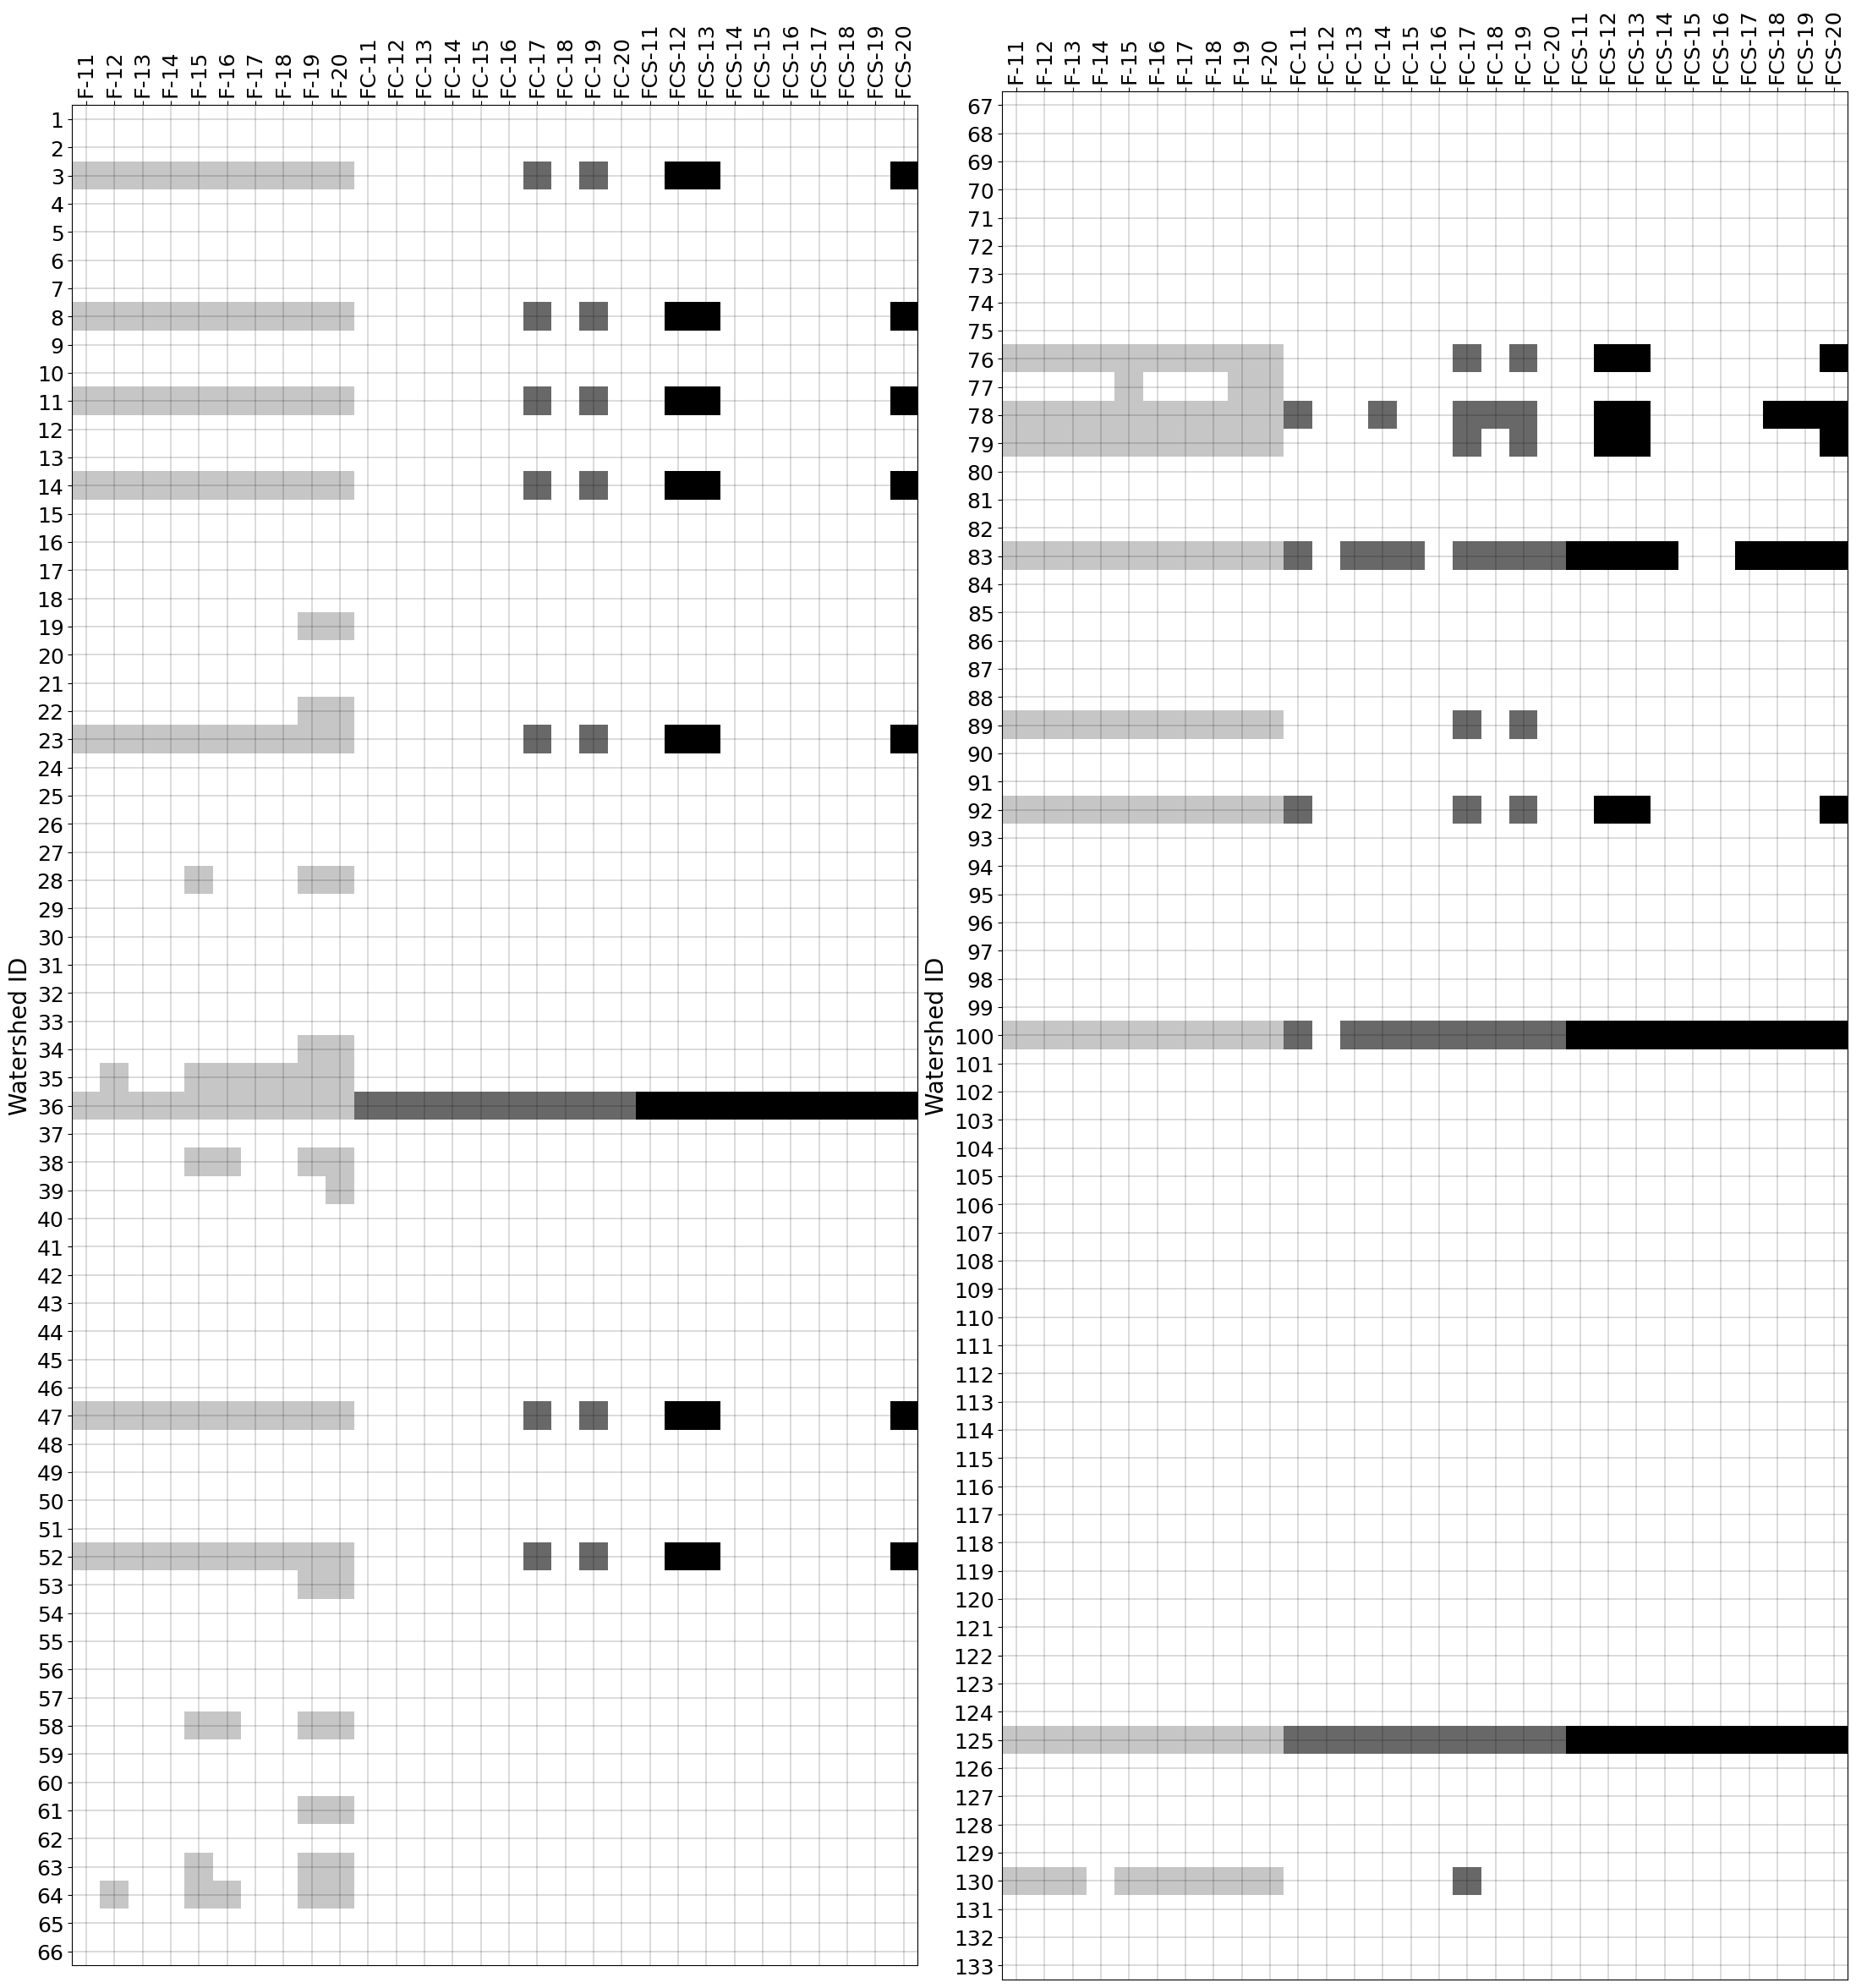

In [5]:
# exemplars
station_df = pd.read_csv(os.path.join(os.getenv("area_station_list_path")))

funct_df = ChangeExemplarsToBinary(os.path.join(directory, "ap_results", "func.csv"))
functClimate_df = ChangeExemplarsToBinary(os.path.join(directory, "ap_results", "func_climate.csv"))
structFunctClimate_df = ChangeExemplarsToBinary(os.path.join(directory, "ap_results", "all_attributes.csv"))
combined_df = pd.concat([funct_df, functClimate_df, structFunctClimate_df], axis=1)
combined_df["area"] = station_df["area"].to_list()

# sort the dataframe by area
combined_df = combined_df.sort_values(by=["area"])

# # rest the index
combined_df = combined_df.reset_index(drop=True)
combined_df.index = combined_df.index + 1


x_labels_1 = []
for i in range(10):
    x_labels_1.append("F-" + str(i + 11))
for i in range(10):
    x_labels_1.append("FC-" + str(i + 11))
for i in range(10):
    x_labels_1.append("FCS-" + str(i + 11))


all_annual_cluster_df = combined_df.iloc[:, :-1]

for col in all_annual_cluster_df.columns[10:20]:
    all_annual_cluster_df[col] = all_annual_cluster_df[col].map(
        lambda x: 2 if x == 1 else x
    )

for col in all_annual_cluster_df.columns[20:]:
    all_annual_cluster_df[col] = all_annual_cluster_df[col].map(
        lambda x: 3 if x == 1 else x
    )


annual_cluster_df_1 = all_annual_cluster_df.iloc[:66, :]

annual_cluster_df_2 = all_annual_cluster_df.iloc[66:, :]

annual_cluster_array_1 = annual_cluster_df_1.to_numpy()

annual_cluster_array_2 = annual_cluster_df_2.to_numpy()

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(30, 25), gridspec_kw={"hspace": 0.08}
)

ax1.imshow(annual_cluster_array_1, cmap="Greys", interpolation="none")
ax1.set_xticks(range(annual_cluster_df_1.shape[1]))
ax1.set_yticks(range(annual_cluster_df_1.shape[0]))
ax1.grid(True, color="black", linewidth=0.2)
# background_rect = patches.Rectangle((0, 0), 1, 1, transform=ax1.transAxes, facecolor='white')
# ax1.add_patch(background_rect)

# # set x and y labels:
y_labels_1 = list(annual_cluster_df_1.index)
ax1.set_yticklabels(y_labels_1, fontsize=18)
ax1.set_xticklabels(x_labels_1, fontsize=18, rotation=90)
ax1.xaxis.tick_top()


ax2.imshow(annual_cluster_array_2, cmap="Greys", interpolation="none")
ax2.set_xticks(range(annual_cluster_df_2.shape[1]))
ax2.set_yticks(range(annual_cluster_df_2.shape[0]))
ax2.grid(True, color="black", linewidth=0.2)

# set x and y labels:
y_labels_2 = list(annual_cluster_df_2.index)
ax2.set_yticklabels(y_labels_2, fontsize=18)
ax2.set_xticklabels(x_labels_1, fontsize=18, rotation=90)
ax2.xaxis.tick_top()

# label y axis:
ax1.set_ylabel("Watershed ID", fontsize=20)
ax2.set_ylabel("Watershed ID", fontsize=20)


plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.2, right=0.9, top=1, bottom=0.1)


In [10]:
# func dataset:
def generateExemplarLocation(datasetPath: str, subbasin_list: list) -> dict:
    func_df = pd.read_csv(datasetPath)
    func_df['sub_basin'] = subbasin_list
    func_df.index += 1

    sumExemplarsAndLocations = {}
    exemplarsLocationOutput = {}

    # drop the station_id and sub_basin columns
    new_func_df = func_df.drop(columns=["station_id", "sub_basin"])

    for col in new_func_df.columns:
        subbasin_labels = []
        exemplarsAndLocations = {"EB": [], "WB": [], "CB": [], "HE": []}
        unique_values = func_df[col].unique().tolist()
        for exemplar in unique_values:
            subbasin_labels.append(func_df.loc[exemplar, "sub_basin"])
        # print(f'subbasins {subbasin_labels} --> {unique_values}')

        for subbasin, exemplar in zip(subbasin_labels, unique_values):
            if subbasin == "EB":
                exemplarsAndLocations["EB"].append(exemplar)
            elif subbasin == "WB":
                exemplarsAndLocations["WB"].append(exemplar)
            elif subbasin == "CB":
                exemplarsAndLocations["CB"].append(exemplar)
            elif subbasin == "HE":
                exemplarsAndLocations["HE"].append(exemplar)

        sumExemplarsAndLocations[col] = exemplarsAndLocations

    # generate the output dictionary
    temp = {}
    for col, values in sumExemplarsAndLocations.items():
        for key, value in values.items():
            new_values = len(value)
            temp = exemplarsLocationOutput.get(col, {})
            temp[key] = new_values
            exemplarsLocationOutput[col] = temp.copy()


    return exemplarsLocationOutput

# stack barchats watershed exemplars and their locations.
subbasins_df = pd.read_csv(os.path.join(os.getenv("output_dir"), "subbasins.csv"))
subbasin_list = subbasins_df["sub_basin"].to_list()

funcExemplarsLocation = generateExemplarLocation(os.path.join(directory, "ap_results", "func.csv"), subbasin_list)
funcClimateExemplarsLocation = generateExemplarLocation(os.path.join(directory, "ap_results", "func_climate.csv"), subbasin_list)
allAttributesExemplarsLocation = generateExemplarLocation(os.path.join(directory, "ap_results", "all_attributes.csv"), subbasin_list)

allAttributesExemplarsLocation_dict = {}

# combine the three dictionaries into one
for key, value in funcExemplarsLocation.items():
    allAttributesExemplarsLocation_dict[key] = value

for key, value in funcClimateExemplarsLocation.items():
    allAttributesExemplarsLocation_dict[key] = value

for key, value in allAttributesExemplarsLocation.items():
    allAttributesExemplarsLocation_dict[key] = value


exemplarsLocation_df = pd.DataFrame.from_dict(allAttributesExemplarsLocation_dict, orient="index")

new_index = ["F-11", "F-12", "F-13", "F-14", "F-15", "F-16", "F-17", "F-18", "F-19", "F-20",
             "FC-11", "FC-12", "FC-13", "FC-14", "FC-15", "FC-16", "FC-17", "FC-18", "FC-19", "FC-20",
             "FCS-11", "FCS-12", "FCS-13", "FCS-14", "FCS-15", "FCS-16", "FCS-17", "FCS-18", "FCS-19", "FCS-20"]

exemplarsLocation_df.index = new_index
subbasins_df

,station_id,station_name,country,watershed_area,latitude,longitude,sub_basin
0,02GA003,SYDENHAM RIVER NEAR ALVINSTON,Canada,701.179031,42.830810,-81.851720,EB
1,02GA005,SYDENHAM RIVER AT FLORENCE,Canada,1149.322027,42.650610,-82.008390,EB
2,02GA010,SYDENHAM RIVER AT STRATHROY,Canada,170.593878,42.958860,-81.627140,EB
3,02GA014,BEAR CREEK NEAR PETROLIA,Canada,248.722103,42.905830,-82.119110,EB
4,02GA015,BEAR CREEK BELOW BRIGDEN,Canada,535.608101,42.812030,-82.298420,EB
...,...,...,...,...,...,...,...
128,4215500,CAZENOVIA CREEK AT EBENEZER NY,US,350.724600,42.829781,-78.775031,EB
129,4216418,TONAWANDA CREEK AT ATTICA NY,US,196.472700,42.863949,-78.283628,EB
130,4217000,TONAWANDA CREEK AT BATAVIA NY,US,443.268000,42.997560,-78.188628,EB
131,4218000,TONAWANDA CREEK AT RAPIDS NY,US,896.973300,43.093113,-78.636140,EB


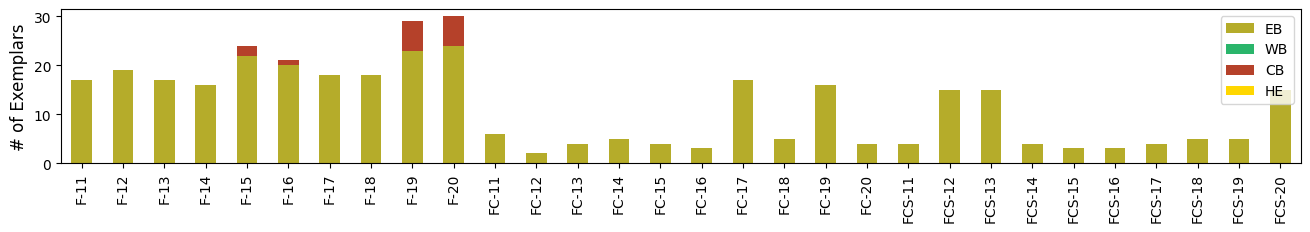

In [196]:
# plot the stacked bar chart
fig, ax = plt.subplots(figsize=(16, 2))
exemplarsLocation_df.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=["#b5ac2a", "#2ab56b", "#b5412a" ,"#FFD700"],
)

plt.legend(
    loc="upper right",
    labels=["EB", "WB", "CB", "HE"],
    fontsize=10,
)
# plt.xticks([])
plt.ylabel("# of Exemplars", fontsize=12)
# plt.xlabel()
plt.show()

In [7]:
exemplarsLocation_df

,EB,WB,CB,HE
F-11,17,0,0,0
F-12,19,0,0,0
F-13,17,0,0,0
F-14,16,0,0,0
F-15,22,0,2,0
F-16,20,0,1,0
F-17,18,0,0,0
F-18,18,0,0,0
F-19,23,0,6,0
F-20,24,0,6,0
